In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from skbio.stats.ordination import pcoa

In [103]:
concentracoes_padrao = [0.25, 0.5, 0.75, 1.0]

X = np.array(concentracoes_padrao).reshape(-1,1)

modelo = LinearRegression()

def pi_calc(L, a, b, d, f1 = 1.2, f2 = 60):
    '''Função que calcula fósforo inorgânico (Pi)
       para uma determinada leitura, com base em
       uma curva de calibração.
    
       Parâmetros:

       L: valor da leitura da amostra em absorbância
       a: coeficiente angular da reta dos padrões
       b: coeficiente linear da reta dos padrões
       d: fator de diluição do extrato
       f1: fator de diluição da leitura da amostra (2,5 mL alíquota + 0,5 mL RT)
       f2: fator de diluição solo:extrator (0,5:30)

       Retorna:

       Quantidade de P inorgânico.
    '''
    pi = ((L-b)/a)*d*f1*f2

    return pi

### P resina. Extratora HCl 0,5 M

In [104]:
#Padrões
p025_resina = pd.read_csv('MD_P_padrao_0,25_22_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))
p05_resina = pd.read_csv('MD_P_padrao_0,5_22_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))
p075_resina = pd.read_csv('MD_P_padrao_0,75_22_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))
p1_resina = pd.read_csv('MD_P_padrao_1_22_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))

lista_padroes_resina = [p025_resina, p05_resina, p075_resina, p1_resina]

#Amostras
r1_10_resina = pd.read_csv("MD_P_amostra_R1_0-10_22_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
r1_20_resina = pd.read_csv("MD_P_amostra_R1_10-20_22_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
r2_10_resina = pd.read_csv("MD_P_amostra_R2_0-10_22_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
r2_20_resina = pd.read_csv("MD_P_amostra_R2_10-20_22_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
p2_10_resina = pd.read_csv("MD_P_amostra_P2_0-10_22_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
p2_20_resina = pd.read_csv("MD_P_amostra_P2_10-20_22_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))

lista_amostras_resina = [r1_10_resina, r1_20_resina, r2_10_resina, r2_20_resina, p2_10_resina, p2_20_resina]

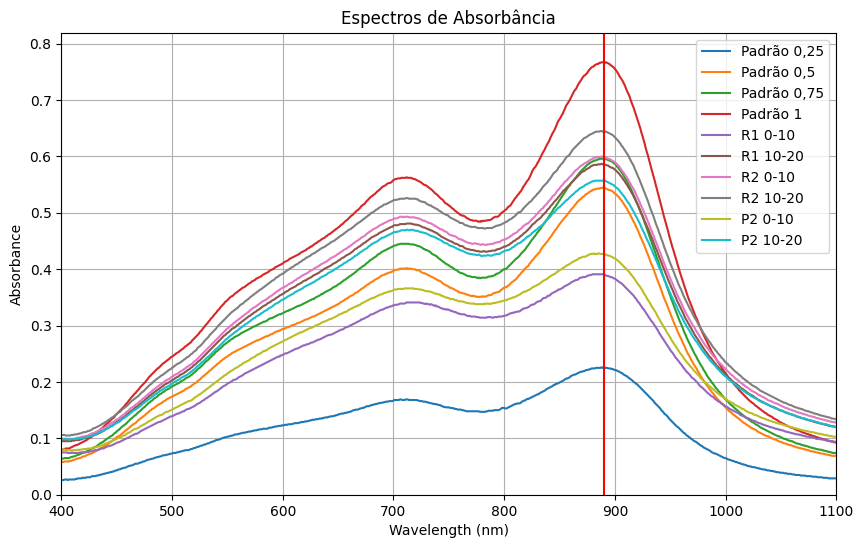

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

dataframes = [
    (p025_resina, "Padrão 0,25"),
    (p05_resina, "Padrão 0,5"),
    (p075_resina, "Padrão 0,75"),
    (p1_resina, "Padrão 1"),
    (r1_10_resina, "R1 0-10"),
    (r1_20_resina, "R1 10-20"),
    (r2_10_resina, "R2 0-10"),
    (r2_20_resina, "R2 10-20"),
    (p2_10_resina, "P2 0-10"),
    (p2_20_resina, "P2 10-20")
]

plt.figure(figsize=(10,6))

for df, label in dataframes:
    plt.plot(df["Wavelength (nm)"], df["Absorbance"], label=label)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")
plt.title("Espectros de Absorbância")
plt.legend()
plt.xlim(400, 1100)
plt.ylim(0)
plt.grid(True)
plt.axvline(x=890, color = 'red')
plt.show()

In [106]:
#Curva de calibração
valores_padroes_resina = [padrao['Absorbance'].loc[padrao['Wavelength (nm)'] == 890].values[0] for padrao in lista_padroes_resina]

y_resina = valores_padroes_resina

y_resina.pop(1)

X = np.delete(X, 1, axis=0).reshape(-1, 1)

modelo.fit(X, y_resina)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


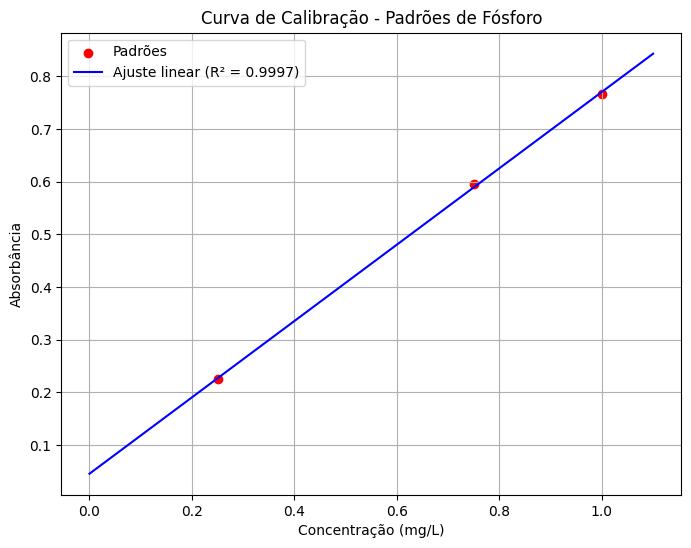

Equação da curva: Absorbância = 0.7251 * Concentração + 0.0456
R² = 0.9997


In [108]:
x_fit = np.linspace(0, 1.1, 90).reshape(-1,1)
y_fit = modelo.predict(x_fit)

r2 = modelo.score(X, y_resina)

a_resina = modelo.coef_[0]
b_resina = modelo.intercept_

plt.figure(figsize=(8,6))
plt.scatter(X, y_resina, color='red', label='Padrões')
plt.plot(x_fit, y_fit, color='blue', label=f'Ajuste linear (R² = {r2:.4f})')
plt.xlabel("Concentração (mg/L)")
plt.ylabel("Absorbância")
plt.title("Curva de Calibração - Padrões de Fósforo")
plt.legend()
plt.grid(True)
plt.show()

print(f"Equação da curva: Absorbância = {modelo.coef_[0]:.4f} * Concentração + {modelo.intercept_:.4f}")
print(f"R² = {r2:.4f}")

In [109]:
# Quantificando P resina

valores_amostras_resina = [amostra['Absorbance'].loc[amostra['Wavelength (nm)'] == 890].values[0] for amostra in lista_amostras_resina]

R1_0_10_resina = pi_calc(valores_amostras_resina[0], a_resina, b_resina, 1)
R1_10_20_resina = pi_calc(valores_amostras_resina[1], a_resina, b_resina, 1)
R2_0_10_resina = pi_calc(valores_amostras_resina[2], a_resina, b_resina, 1)
R2_10_20_resina = pi_calc(valores_amostras_resina[3], a_resina, b_resina, 1)
P2_0_10_resina = pi_calc(valores_amostras_resina[4], a_resina, b_resina, 1)
P2_10_20_resina = pi_calc(valores_amostras_resina[5], a_resina, b_resina, 1)

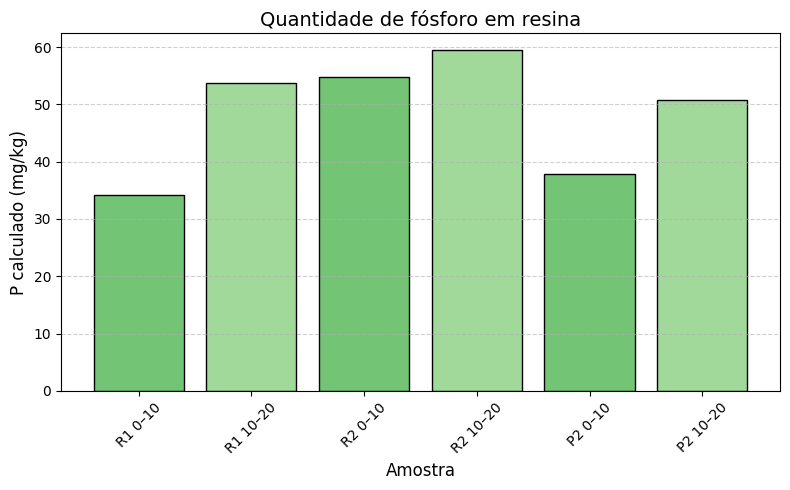

In [123]:
valores = [
    R1_0_10_resina,
    R1_10_20_resina,
    R2_0_10_resina,
    R2_10_20_resina,
    P2_0_10_resina,
    P2_10_20_resina
]

# Rótulos correspondentes
labels = [
    'R1 0–10',
    'R1 10–20',
    'R2 0–10',
    'R2 10–20',
    'P2 0–10',
    'P2 10–20'
]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, valores, color=['#74c476', '#a1d99b'], edgecolor='black')

plt.title('Quantidade de fósforo em resina', fontsize=14)
plt.ylabel('P calculado (mg/kg)', fontsize=12)
plt.xlabel('Amostra', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

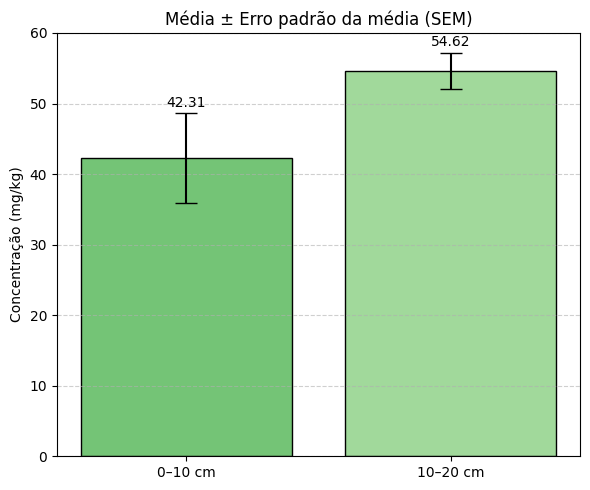

In [114]:
pi_0_10 = np.array([
    R1_0_10_resina,
    R2_0_10_resina,
    P2_0_10_resina
])

pi_10_20 = np.array([
    R1_10_20_resina,
    R2_10_20_resina,
    P2_10_20_resina
])

# Estatísticas
means = [pi_0_10.mean(), pi_10_20.mean()]
stds = [pi_0_10.std(ddof=1), pi_10_20.std(ddof=1)]  # desvio padrão
ns = [len(pi_0_10), len(pi_10_20)]
sems = [stds[i] / np.sqrt(ns[i]) for i in range(2)]  # erro padrão da média

# Gráfico de barras
labels = ['0–10 cm', '10–20 cm']
x = np.arange(len(labels))

plt.figure(figsize=(6, 5))
plt.bar(x, means, yerr=sems, capsize=8, color=['#74c476', '#a1d99b'], edgecolor='black')

# Estética
plt.xticks(x, labels)
plt.ylabel('Concentração de P (mg/kg)')
plt.title('Média ± Erro padrão da média (SEM)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores numéricos acima das barras
for i, v in enumerate(means):
    plt.text(i, v + sems[i] + 0.01 * v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [117]:
pi_0_10 = np.array([R1_0_10_resina, R2_0_10_resina, P2_0_10_resina])
pi_10_20 = np.array([R1_10_20_resina, R2_10_20_resina, P2_10_20_resina])

F_stat, p_value = f_oneway(pi_0_10, pi_10_20)
print(f"F = {F_stat:.3f}, p = {p_value:.4f}")

F = 3.231, p = 0.1466


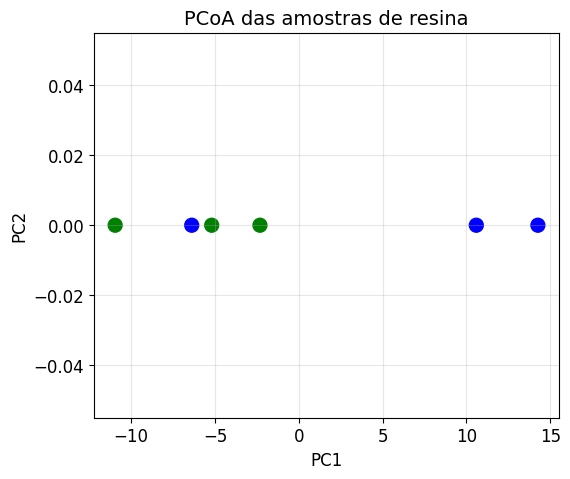

In [122]:
# Organize os valores em um array (cada linha = uma amostra)
X = np.array([
    [R1_0_10_resina],
    [R2_0_10_resina],
    [P2_0_10_resina],
    [R1_10_20_resina],
    [R2_10_20_resina],
    [P2_10_20_resina]
])

# Calculando a matriz de distâncias euclidianas
from scipy.spatial.distance import pdist, squareform
dist_matrix = squareform(pdist(X, metric='euclidean'))

# PCoA
pcoa_res = pcoa(dist_matrix)

# Plotando os dois primeiros eixos
plt.figure(figsize=(6,5))
plt.scatter(pcoa_res.samples['PC1'], pcoa_res.samples['PC2'], 
            c=['blue']*3 + ['green']*3, s=100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('PCoA das amostras de resina', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


### P inorgânico. Extratora: bicarbonato de sódio

In [125]:
#Padrões
p025_bicarbonato = pd.read_csv('MD_P_padrao_0,25_23_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))
p05_bicarbonato = pd.read_csv('MD_P_padrao_0,5_23_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))
p075_bicarbonato = pd.read_csv('MD_P_padrao_0,75_23_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))
p1_bicarbonato = pd.read_csv('MD_P_padrao_1_23_09_2025.txt', encoding="cp1252", sep=",", skiprows=range(0, 42))

lista_padroes_bicarbonato = [p025_bicarbonato, p05_bicarbonato, p075_bicarbonato, p1_bicarbonato]

#Amostras
r1_10_bicarbonato = pd.read_csv("MD_P_amostra_R1_0-10_23_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
r1_20_bicarbonato = pd.read_csv("MD_P_amostra_R1_10-20_23_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
r2_10_bicarbonato = pd.read_csv("MD_P_amostra_R2_0-10_23_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
r2_20_bicarbonato = pd.read_csv("MD_P_amostra_R2_10-20_23_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
p2_10_bicarbonato = pd.read_csv("MD_P_amostra_P2_0-10(certo)_23_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))
p2_20_bicarbonato = pd.read_csv("MD_P_amostra_P2_10-20_23_09_2025.txt", encoding="cp1252", sep=",", skiprows=range(0, 42))

lista_amostras_bicarbonato = [r1_10_bicarbonato, r1_20_bicarbonato, r2_10_bicarbonato, r2_20_bicarbonato, p2_10_bicarbonato, p2_20_bicarbonato]

FileNotFoundError: [Errno 2] No such file or directory: 'MD_P_padrao_0,25_23_09_2025.txt'

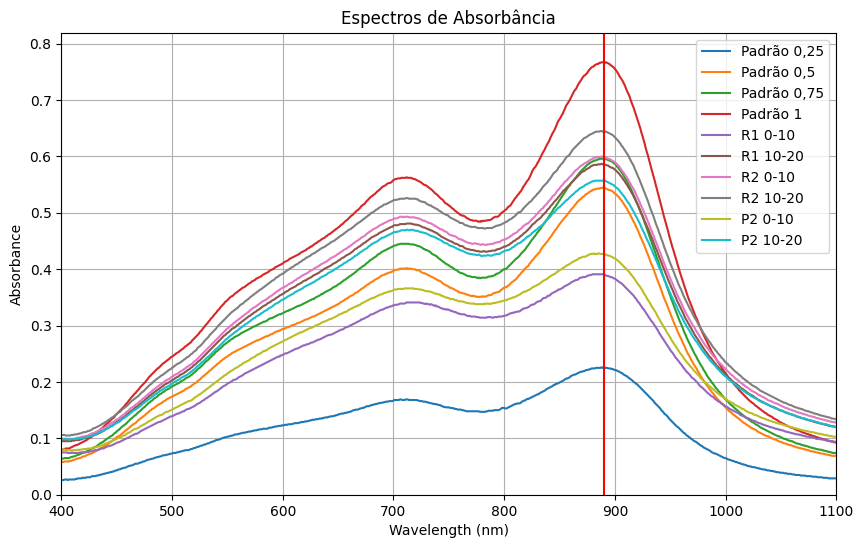

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataframes = [
    (p025_resina, "Padrão 0,25"),
    (p05_resina, "Padrão 0,5"),
    (p075_resina, "Padrão 0,75"),
    (p1_resina, "Padrão 1"),
    (r1_10_resina, "R1 0-10"),
    (r1_20_resina, "R1 10-20"),
    (r2_10_resina, "R2 0-10"),
    (r2_20_resina, "R2 10-20"),
    (p2_10_resina, "P2 0-10"),
    (p2_20_resina, "P2 10-20")
]

plt.figure(figsize=(10,6))

for df, label in dataframes:
    plt.plot(df["Wavelength (nm)"], df["Absorbance"], label=label)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")
plt.title("Espectros de Absorbância")
plt.legend()
plt.xlim(400, 1100)
plt.ylim(0)
plt.grid(True)
plt.axvline(x=890, color = 'red')
plt.show()

In [ ]:
#Curva de calibração
valores_padroes_resina = [padrao['Absorbance'].loc[padrao['Wavelength (nm)'] == 890].values[0] for padrao in lista_padroes_resina]

y_resina = valores_padroes_resina

y_resina.pop(1)

X = np.delete(X, 1, axis=0).reshape(-1, 1)

modelo.fit(X, y_resina)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


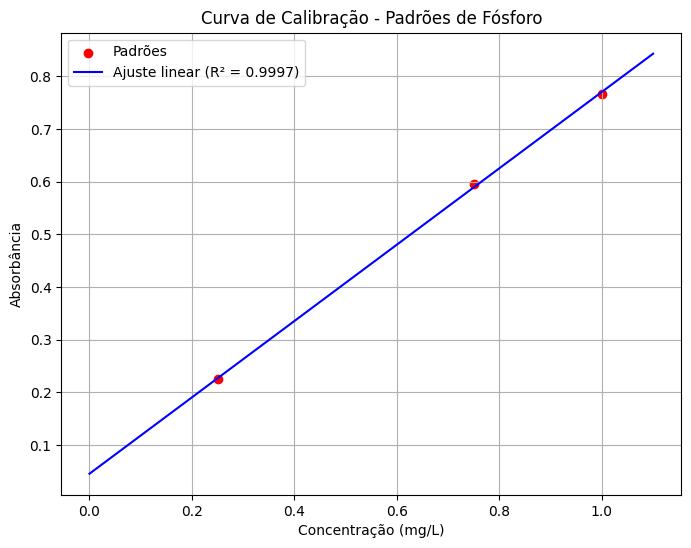

Equação da curva: Absorbância = 0.7251 * Concentração + 0.0456
R² = 0.9997


In [ ]:
x_fit = np.linspace(0, 1.1, 90).reshape(-1,1)
y_fit = modelo.predict(x_fit)

r2 = modelo.score(X, y_resina)

a_resina = modelo.coef_[0]
b_resina = modelo.intercept_

plt.figure(figsize=(8,6))
plt.scatter(X, y_resina, color='red', label='Padrões')
plt.plot(x_fit, y_fit, color='blue', label=f'Ajuste linear (R² = {r2:.4f})')
plt.xlabel("Concentração (mg/L)")
plt.ylabel("Absorbância")
plt.title("Curva de Calibração - Padrões de Fósforo")
plt.legend()
plt.grid(True)
plt.show()

print(f"Equação da curva: Absorbância = {modelo.coef_[0]:.4f} * Concentração + {modelo.intercept_:.4f}")
print(f"R² = {r2:.4f}")

In [ ]:
# Quantificando P resina

valores_amostras_resina = [amostra['Absorbance'].loc[amostra['Wavelength (nm)'] == 890].values[0] for amostra in lista_amostras_resina]

R1_0_10_resina = pi_calc(valores_amostras_resina[0], a_resina, b_resina, 1)
R1_10_20_resina = pi_calc(valores_amostras_resina[1], a_resina, b_resina, 1)
R2_0_10_resina = pi_calc(valores_amostras_resina[2], a_resina, b_resina, 1)
R2_10_20_resina = pi_calc(valores_amostras_resina[3], a_resina, b_resina, 1)
P2_0_10_resina = pi_calc(valores_amostras_resina[4], a_resina, b_resina, 1)
P2_10_20_resina = pi_calc(valores_amostras_resina[5], a_resina, b_resina, 1)

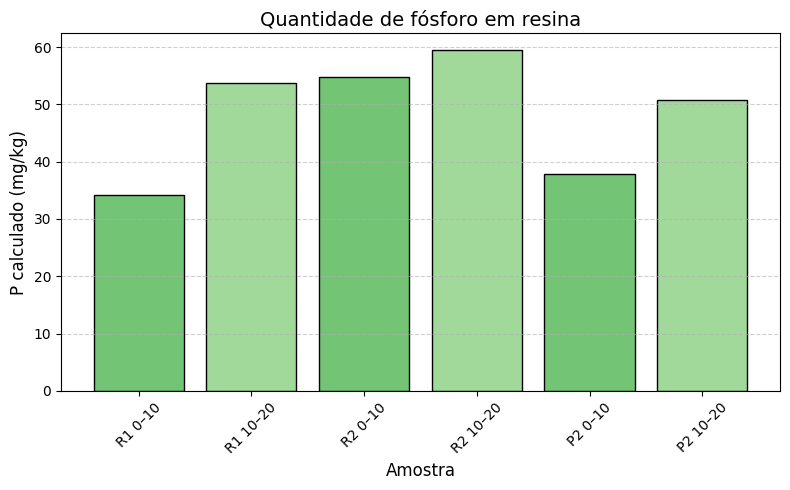

In [ ]:
valores = [
    R1_0_10_resina,
    R1_10_20_resina,
    R2_0_10_resina,
    R2_10_20_resina,
    P2_0_10_resina,
    P2_10_20_resina
]

# Rótulos correspondentes
labels = [
    'R1 0–10',
    'R1 10–20',
    'R2 0–10',
    'R2 10–20',
    'P2 0–10',
    'P2 10–20'
]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, valores, color=['#74c476', '#a1d99b'], edgecolor='black')

plt.title('Quantidade de fósforo em resina', fontsize=14)
plt.ylabel('P calculado (mg/kg)', fontsize=12)
plt.xlabel('Amostra', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

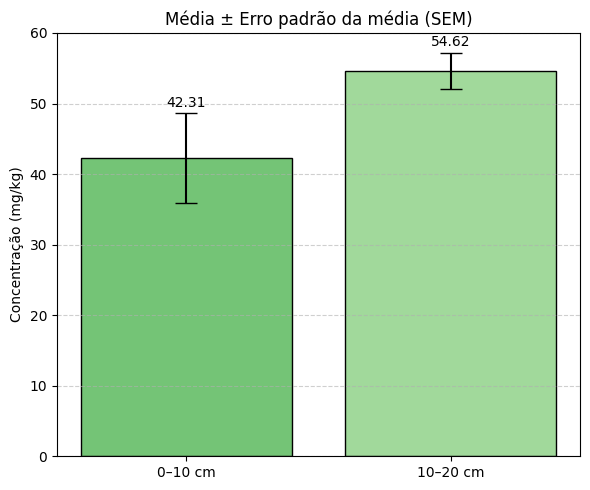

In [ ]:
pi_0_10 = np.array([
    R1_0_10_resina,
    R2_0_10_resina,
    P2_0_10_resina
])

pi_10_20 = np.array([
    R1_10_20_resina,
    R2_10_20_resina,
    P2_10_20_resina
])

# Estatísticas
means = [pi_0_10.mean(), pi_10_20.mean()]
stds = [pi_0_10.std(ddof=1), pi_10_20.std(ddof=1)]  # desvio padrão
ns = [len(pi_0_10), len(pi_10_20)]
sems = [stds[i] / np.sqrt(ns[i]) for i in range(2)]  # erro padrão da média

# Gráfico de barras
labels = ['0–10 cm', '10–20 cm']
x = np.arange(len(labels))

plt.figure(figsize=(6, 5))
plt.bar(x, means, yerr=sems, capsize=8, color=['#74c476', '#a1d99b'], edgecolor='black')

# Estética
plt.xticks(x, labels)
plt.ylabel('Concentração de P (mg/kg)')
plt.title('Média ± Erro padrão da média (SEM)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores numéricos acima das barras
for i, v in enumerate(means):
    plt.text(i, v + sems[i] + 0.01 * v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
pi_0_10 = np.array([R1_0_10_resina, R2_0_10_resina, P2_0_10_resina])
pi_10_20 = np.array([R1_10_20_resina, R2_10_20_resina, P2_10_20_resina])

F_stat, p_value = f_oneway(pi_0_10, pi_10_20)
print(f"F = {F_stat:.3f}, p = {p_value:.4f}")

F = 3.231, p = 0.1466


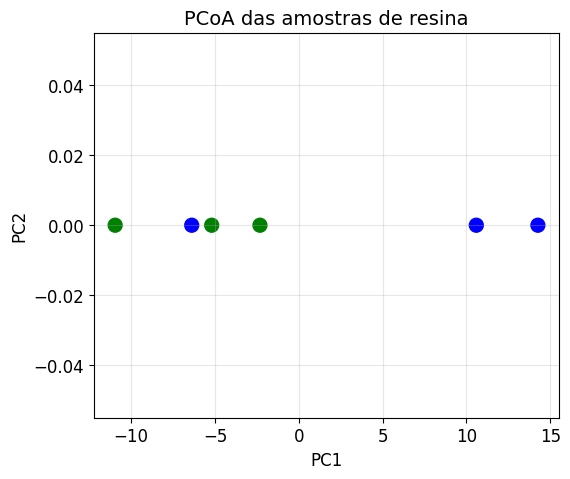

In [ ]:
# Organize os valores em um array (cada linha = uma amostra)
X = np.array([
    [R1_0_10_resina],
    [R2_0_10_resina],
    [P2_0_10_resina],
    [R1_10_20_resina],
    [R2_10_20_resina],
    [P2_10_20_resina]
])

# Calculando a matriz de distâncias euclidianas
from scipy.spatial.distance import pdist, squareform
dist_matrix = squareform(pdist(X, metric='euclidean'))

# PCoA
pcoa_res = pcoa(dist_matrix)

# Plotando os dois primeiros eixos
plt.figure(figsize=(6,5))
plt.scatter(pcoa_res.samples['PC1'], pcoa_res.samples['PC2'], 
            c=['blue']*3 + ['green']*3, s=100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('PCoA das amostras de resina', fontsize=14)
plt.grid(alpha=0.3)
plt.show()
